In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
train_set = pd.read_csv('../input/titanic/train.csv')
test_set = pd.read_csv('../input/titanic/test.csv')
ID = test_set['PassengerId']
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#drop columns not usepassanger_id = data_test['PassengerId']
train_set = train_set.drop(['PassengerId', 'Ticket','Name','Cabin'], axis=1)
test_set = test_set.drop(['PassengerId', 'Ticket','Name','Cabin'], axis=1)
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Explore tha data

I will use box plot to select feature.

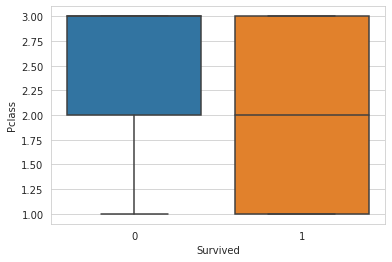

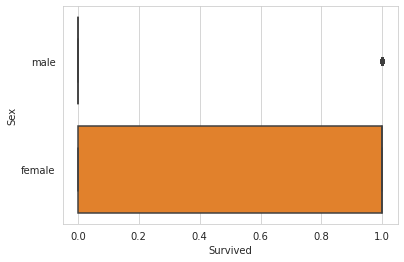

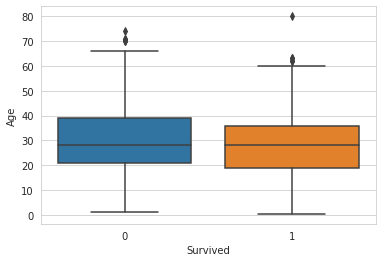

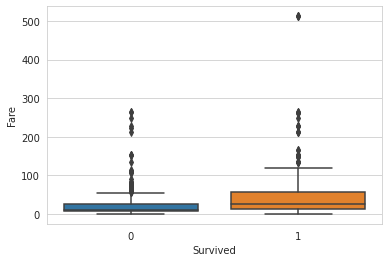

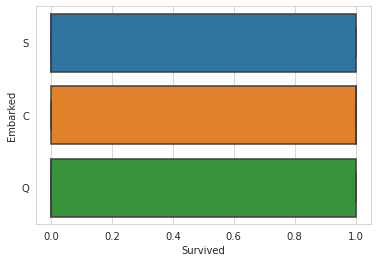

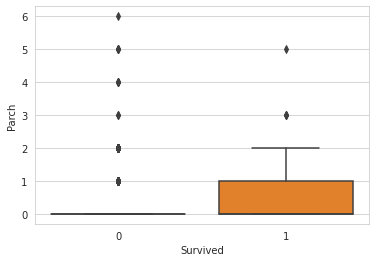

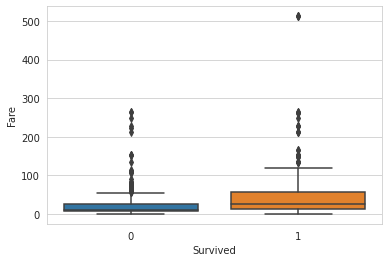

In [6]:
def plot_box(data, cols, col_x = 'Survived'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
        
num_cols = ['Pclass','Sex','Age','Fare','Embarked','Parch', 'Fare']
plot_box(train_set, num_cols)

From box plot, I selected 'Pclass','Sex','Age','Fare','Sibsp','Parch'

In [7]:
#Drop column 'Embarked'
train_set = train_set.drop(['Embarked'], axis=1)
test_set = test_set.drop(['Embarked'], axis=1)
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


# Cleaning the data

In [8]:
#Cleaning data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_set['Age'] = imputer.fit_transform(train_set[['Age']])
test_set['Age'] = imputer.fit_transform(test_set[['Age']])
train_set['Fare'] = imputer.fit_transform(train_set[['Fare']])
test_set['Fare'] = imputer.fit_transform(test_set[['Fare']])

train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


**Map data**

In [9]:

train_set['Sex'] = train_set['Sex'].map({'male': 1, 'female': 0})
test_set['Sex'] = test_set['Sex'].map({'male': 1, 'female': 0})
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [10]:
#Check missing data again
train_set.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [11]:
#Check null values again
train_set.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [12]:
#Declare

x = train_set.iloc[:, 1:].values
y = train_set.iloc[:, 0].values


# Training Model

**Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0 )

Optimize model with GridSearchCV

In [14]:
#Train model with Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

def logisticregression(train,test):
 model = LogisticRegression(random_state=0).fit(train, y_train)
 y_train_pred = model.predict(train)
 y_test_pred = model.predict(test) 
 train_score = accuracy_score(y_train, y_train_pred)
 test_score = accuracy_score(y_test, y_test_pred)
 matrix = confusion_matrix(y_test, y_test_pred)
 print('Logistic Regression')
 print(matrix)
 print('Train accuracy is',train_score )
 print('Test accuracy is',test_score )

    
def decisiontree(train,test):
 model = tree.DecisionTreeClassifier(criterion = 'entropy')
 model = model.fit(train,y_train)
 y_train_pred = model.predict(train)
 y_test_pred = model.predict(test)
 train_score = accuracy_score(y_train , y_train_pred)
 test_score = accuracy_score(y_test, y_test_pred)
 matrix = confusion_matrix(y_test, y_test_pred)
 print('\n','Decision Tree')
 print(matrix)
 print('Train accuracy is',train_score )
 print('Test accuracy is',test_score )
    
def naivebays(train,test):
 model = GaussianNB()
 model = model.fit(train,y_train)
 y_train_pred = model.predict(train)
 y_test_pred = model.predict(test)
 train_score = accuracy_score(y_train , y_train_pred)
 test_score = accuracy_score(y_test, y_test_pred)
 matrix = confusion_matrix(y_test, y_test_pred)
 print('\n','Naive Bayes')
 print(matrix)
 print('Train accuracy is',train_score )
 print('Test accuracy is',test_score )    
    
def randomforest(train,test):
 model = RandomForestClassifier(n_estimators=100,max_depth=4,criterion='gini')
 model = model.fit(train,y_train)
 y_train_pred = model.predict(train)
 y_test_pred = model.predict(test)
 train_score = accuracy_score(y_train , y_train_pred)
 test_score = accuracy_score(y_test, y_test_pred)
 matrix = confusion_matrix(y_test, y_test_pred)
 print('\n','Random Forest')
 print(matrix)
 print('Train accuracy is',train_score )
 print('Test accuracy is',test_score )   


logisticregression(x_train,x_test)
decisiontree(x_train,x_test)
naivebays(x_train,x_test)  
randomforest(x_train,x_test)





Logistic Regression
[[142  26]
 [ 27  73]]
Train accuracy is 0.7881219903691814
Test accuracy is 0.8022388059701493

 Decision Tree
[[138  30]
 [ 33  67]]
Train accuracy is 0.9791332263242376
Test accuracy is 0.7649253731343284

 Naive Bayes
[[138  30]
 [ 28  72]]
Train accuracy is 0.7929373996789727
Test accuracy is 0.7835820895522388

 Random Forest
[[149  19]
 [ 31  69]]
Train accuracy is 0.8443017656500803
Test accuracy is 0.8134328358208955


Then use RandomForestClassifier to predict.

In [15]:
clf =  RandomForestClassifier(n_estimators=100,max_depth=4,criterion='gini')
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(test_set.iloc[:, 0:].values)
submission = pd.DataFrame({'PassengerId': ID, 'Survived': y_pred})
submission.to_csv('submission.csv',index=False)